In [1]:
from PIL import Image
import requests
from io import BytesIO
import json 

def loadImage(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img


In [113]:
url = 'https://a0.muscache.com/im/pictures/85e0f538-1f9a-4eb1-b79d-74cc8d50fd4d.jpg?aki_policy=x_large'

In [114]:
img = loadImage(url)

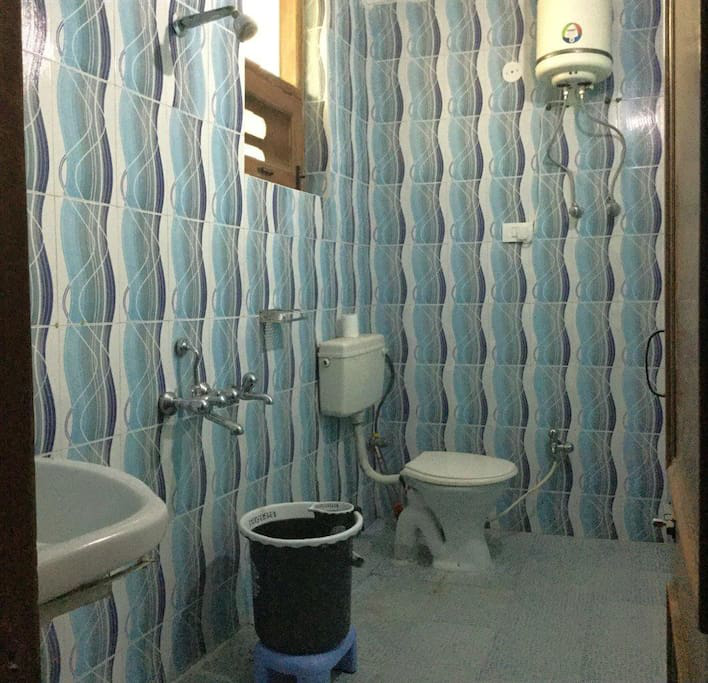

In [115]:
img

In [120]:
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

img = io.imread(url)

average = img.mean(axis=0).mean(axis=0)
pixels = np.float32(img.reshape(-1, 3))

n_colors = 10
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)

dominant = palette[np.argmax(counts)]

In [117]:
dominant

array([102.11405 , 108.814964, 100.82786 ], dtype=float32)

In [118]:
avg_patch = np.ones(shape=img.shape, dtype=np.uint8)*np.uint8(average)

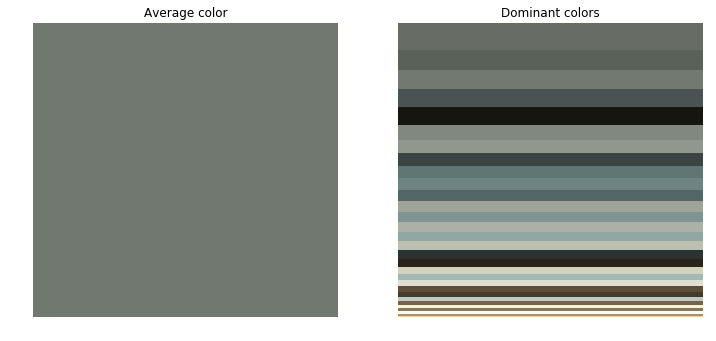

In [119]:

indices = np.argsort(counts)[::-1]   
freqs = np.cumsum(np.hstack([[0], counts[indices]/counts.sum()]))
rows = np.int_(img.shape[0]*freqs)

dom_patch = np.zeros(shape=img.shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
ax0.imshow(avg_patch)
ax0.set_title('Average color')
ax0.axis('off')
ax1.imshow(dom_patch)
ax1.set_title('Dominant colors')
ax1.axis('off')
plt.show(fig)
